<a href="https://colab.research.google.com/github/ruslanbakin/COVID/blob/main/COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузка и первичный анализ данных:
o Загрузите набор данных о заболеваемости COVID-19.
o Оцените общую структуру данных (даты, количество случаев, смертей,
выздоровлений).


<ipython-input-6-e4c12ebdfaed>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


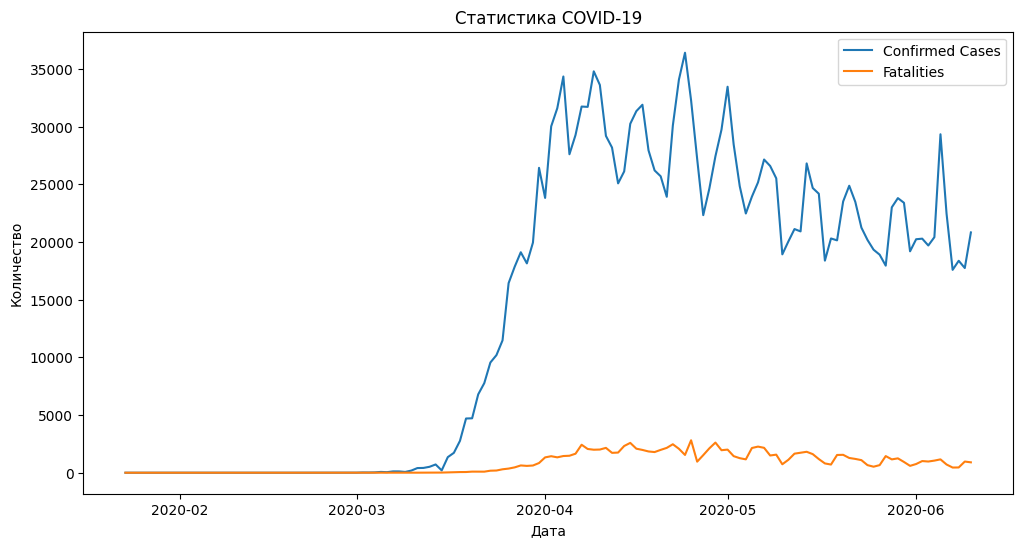

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('train.csv')

# Удаление строк с NaN в столбцах 'County' и 'Province_State'
data = data.dropna(subset=['County', 'Province_State'])

# Преобразование столбца 'Date' в формат datetime
data['Date'] = pd.to_datetime(data['Date'])

# Агрегация данных по дням
aggregated_data = data.groupby(['Date', 'Target'])['TargetValue'].sum().reset_index()

# Визуализация данных
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data[aggregated_data['Target'] == 'ConfirmedCases']['Date'],
         aggregated_data[aggregated_data['Target'] == 'ConfirmedCases']['TargetValue'],
         label='Confirmed Cases')
plt.plot(aggregated_data[aggregated_data['Target'] == 'Fatalities']['Date'],
         aggregated_data[aggregated_data['Target'] == 'Fatalities']['TargetValue'],
         label='Fatalities')
plt.title('Статистика COVID-19')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.legend()
plt.show()


2. Анализ влияния мер безопасности на распространение:
o Постройте графики, сравнивающие динамику случаев в странах с
различными мерами безопасности (карантин, закрытие границ и т.д.).
o Выполните статистический анализ для оценки влияния принятых мер на
уровень заболеваемости.


Статистика по мерам безопасности:
Full       175
Partial     23


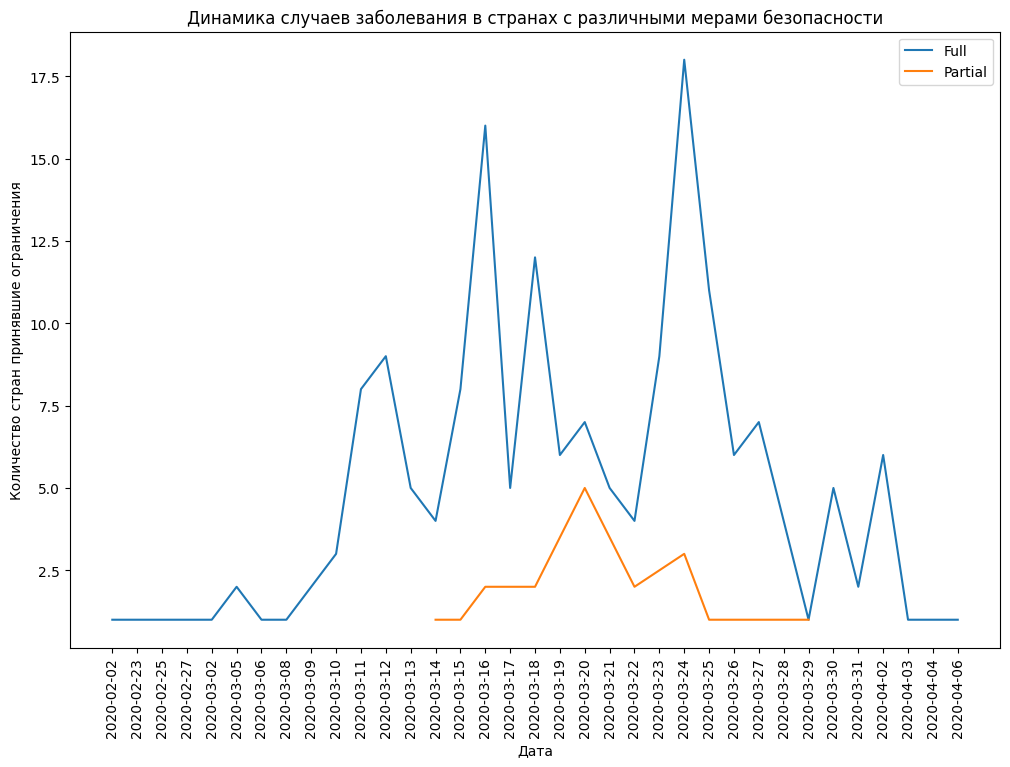

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из файла для анализа мер безопасности
file_path_lockdown = 'countryLockdowndates.csv'
df_lockdown = pd.read_csv(file_path_lockdown, parse_dates=['Date'], dayfirst=True)

# Выбор данных начиная с 2020-02-02
start_date = '2020-02-02'
df_lockdown = df_lockdown[df_lockdown['Date'] >= start_date]

# Преобразование формата даты на графике
df_lockdown['Date'] = df_lockdown['Date'].dt.strftime('%Y-%m-%d')

# Пример: строим график динамики случаев в странах с различными мерами безопасности
plt.figure(figsize=(12, 8))

# Заменяем NaN значения на 'None'
df_lockdown['Type'].fillna('None', inplace=True)

# Группировка данных по типу мер безопасности и дате
grouped_data_lockdown = df_lockdown.groupby(['Type', 'Date']).size().reset_index(name='Count')

# Графики для стран с полными и частичными мерами
sns.lineplot(x='Date', y='Count', hue='Type', data=grouped_data_lockdown)

# Статистика по количеству частичных и полных мер безопасности
statistics = df_lockdown['Type'].value_counts()
print("\nСтатистика по мерам безопасности:")
print(statistics.to_string())

plt.title('Динамика случаев заболевания в странах с различными мерами безопасности')
plt.xlabel('Дата')
plt.ylabel('Количество стран принявшие ограничения')
plt.xticks(rotation=90)
plt.legend()
plt.show()


# 3. Визуализация возрастного распределения:
o Используйте данные о возрасте заболевших для построения гистограммы
возрастного распределения.
o Исследуйте наличие связи между возрастом и тяжестью заболевания.


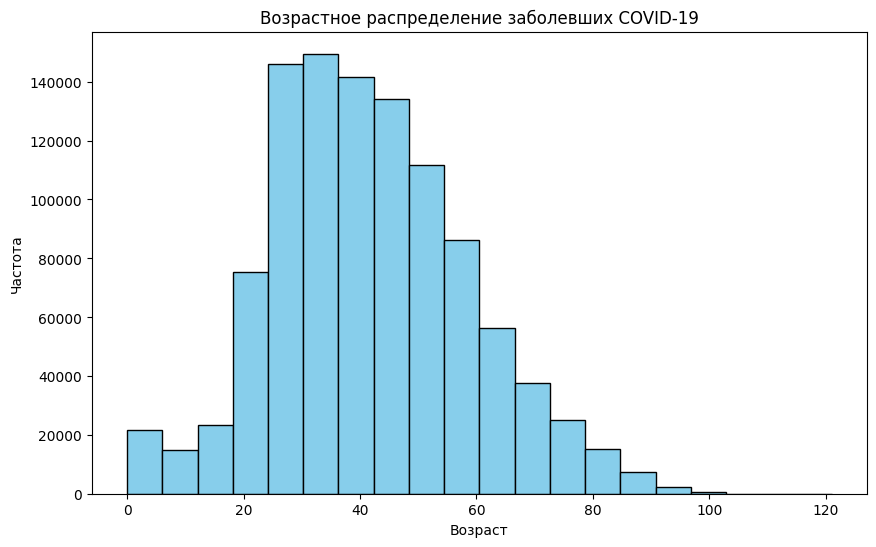

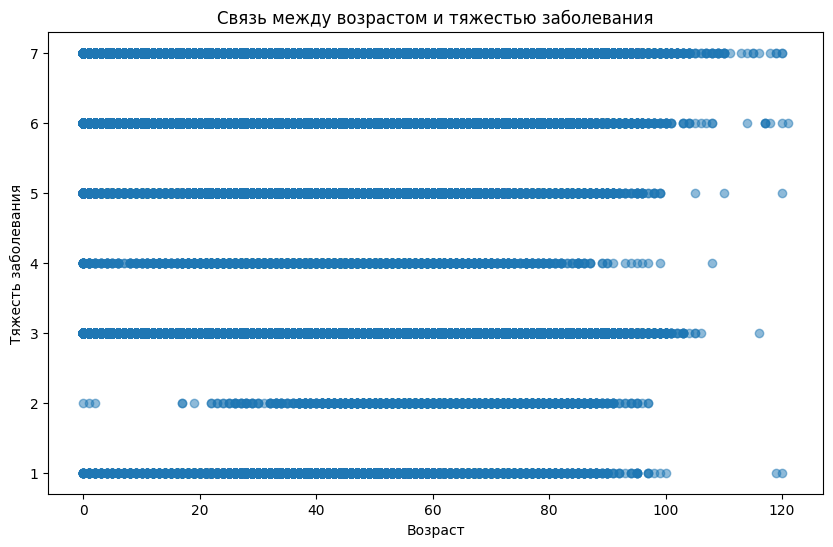

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла
file_path = 'Covid Data.csv'
data = pd.read_csv(file_path)

# Построение гистограммы возрастного распределения
plt.figure(figsize=(10, 6))
plt.hist(data['AGE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Возрастное распределение заболевших COVID-19')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

# Исследование связи между возрастом и тяжестью заболевания
plt.figure(figsize=(10, 6))
plt.scatter(data['AGE'], data['CLASIFFICATION_FINAL'], alpha=0.5)
plt.title('Связь между возрастом и тяжестью заболевания')
plt.xlabel('Возраст')
plt.ylabel('Тяжесть заболевания')
plt.show()


4. Сравнение летальности по полу:
o Постройте круговую диаграмму, отражающую соотношение летальных и
выздоровевших случаев среди мужчин и женщин.
o Выполните статистический тест для проверки гипотезы о различии в
летальности между полами

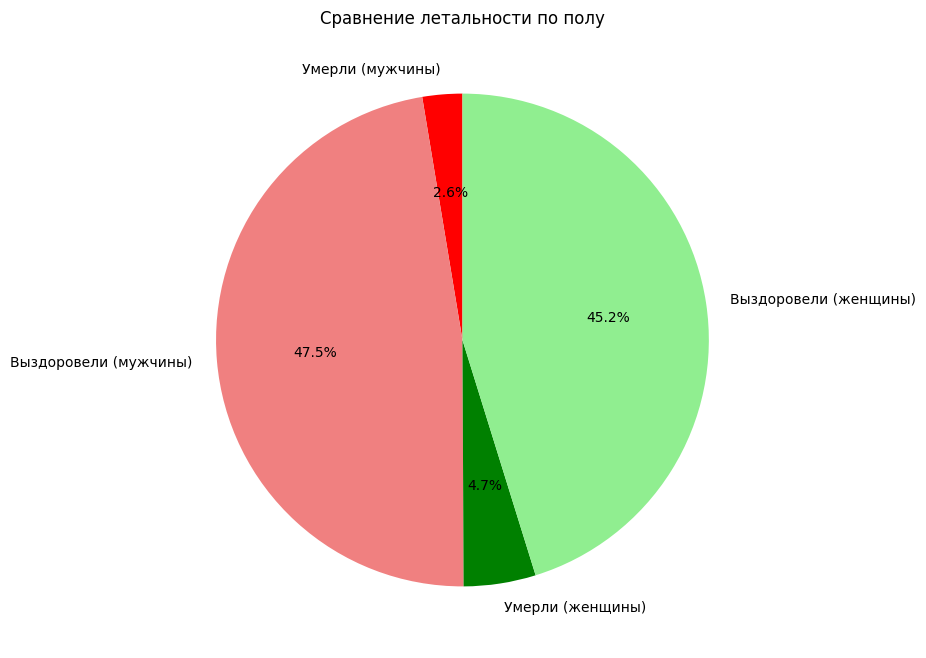

Статистика хи-квадрат: 6944.357267904874
p-значение: 0.0
Отвергаем нулевую гипотезу: есть статистически значимая разница в летальности между мужчинами и женщинами.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Загрузка данных из файла
file_path = 'Covid Data.csv'
data = pd.read_csv(file_path)

# Исправление представления пола
data['SEX'] = data['SEX'].map({1: 'M', 2: 'F'})

# Преобразование столбца DATE_DIED в категориальный (Y - смерть, N - выздоровел)
data['DATE_DIED'] = data['DATE_DIED'].apply(lambda x: 'Y' if x != '9999-99-99' else 'N')

# Фильтрация данных по полу и статусу (жив/мертв)
gender_dead = data[data['SEX'] == 'M'].groupby('DATE_DIED').size().reset_index(name='Count')
gender_recovered = data[data['SEX'] == 'F'].groupby('DATE_DIED').size().reset_index(name='Count')

# Подготовка данных для круговой диаграммы
labels = ['Умерли (мужчины)', 'Выздоровели (мужчины)', 'Умерли (женщины)', 'Выздоровели (женщины)']
sizes = [
    gender_dead[gender_dead['DATE_DIED'] == 'Y']['Count'].values[0] if 'Y' in gender_dead['DATE_DIED'].unique() else 0,
    gender_dead[gender_dead['DATE_DIED'] == 'N']['Count'].values[0] if 'N' in gender_dead['DATE_DIED'].unique() else 0,
    gender_recovered[gender_recovered['DATE_DIED'] == 'Y']['Count'].values[0] if 'Y' in gender_recovered['DATE_DIED'].unique() else 0,
    gender_recovered[gender_recovered['DATE_DIED'] == 'N']['Count'].values[0] if 'N' in gender_recovered['DATE_DIED'].unique() else 0
]

# Исключение значений NaN
sizes = [0 if pd.isna(size) else size for size in sizes]

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'lightcoral', 'green', 'lightgreen'])
plt.title('Сравнение летальности по полу')
plt.show()

# Выполнение статистического теста (например, хи-квадрат)
contingency_table = pd.crosstab(data['SEX'], data['DATE_DIED'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Статистика хи-квадрат: {chi2}')
print(f'p-значение: {p}')

# Проверка гипотезы о различии в летальности между полами
alpha = 0.05
if p < alpha:
    print('Отвергаем нулевую гипотезу: есть статистически значимая разница в летальности между мужчинами и женщинами.')
else:
    print('Не отвергаем нулевую гипотезу: статистически значимой разницы в летальности между мужчинами и женщинами нет.')
